#Problema de clasificare binara

## Importul datelor

Deoarece retele neuronal convolutionale lucreaza cu imagini se va importa un se de tate sub forma de imagini. 
Imaginile cu care vom lucra fa parte dintr-o colectie numita [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) ce contine 101 categorii diferite cu 
101,000 (1000 imagini pe categorie) imagini reale cu tipuri de mancare. 

Pentru început se va lucra doar cu doua categorii: pizza 🍕 si steak 🥩 pentru a se crea un model de clasificare binara.

> 🔑 **Nota:** Pentru pregatirea datelor s-a utiliati diferiti pasi de preprocesare cum ar fi plasarea imaginilor in diferite foldere in functie de subset si altele. Pentru a vedea acesti pasi de preprocesare se va accesa [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

Se download-eaza subsetul `pizza_steak` in fisier de format .zip si se dezarhiveaza

In [ ]:
import zipfile

# Descarcarea fiserului pizza_steak in format zip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Dezarhivarea fisierelor descarcate
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-30 10:43:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.197.128, 173.194.198.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   109MB/s    in 1.0s    

2021-10-30 10:43:42 (109 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspectarea si prelucrarea datelor

### Inspectarea datelor

Inspectarea fiecarui directoriu al datelor descarcate cu ajutorul comenzi `ls`.

In [ ]:
# vizualizarea continutului folderului pizza_steak
!ls pizza_steak

test  train


In [ ]:
# vizualizarea continutului folderului pizza_steak/train
!ls pizza_steak/train/

pizza  steak


In [ ]:
# vizualizarea continutului folderului pizza_steak/train/steak/
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# vizualizarea continutului folderului pizza_steak/train/pizza/
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
# importul os
import os

# Vizualizarea tuturor folderelor si numarului de fisiere din folderul pizza_steak
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# verificarea prezentei unui fisier suplimentare in setul de date ".DS_Store" care trebuie neglijat
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Oct 30 10:43 .
drwxr-xr-x 1 root root 4096 Oct 30 10:43 ..
-rw-r--r-- 1 root root 6148 Oct 30 10:43 .DS_Store
drwxr-xr-x 4 root root 4096 Oct 30 10:43 test
drwxr-xr-x 4 root root 4096 Oct 30 10:43 train


In [ ]:
# O alta modalitate de a vedea jnmarul de fisiere dint-un folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Obtinerea denumirii claselor
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # se transforma calea datelor de training in cale python
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # crearea listei denumirilor claselor donform denumiri folderului
class_names=class_names[1:] # se exclude fisierul ".DS_Store"
print(class_names)

['pizza' 'steak']


### Vizualizarea datelor

Colectia de date contine 750 imagini de training images si 250 de test

In continuare se vor vizualiza unele date

In [ ]:
# crearea unei functii de vizualizarea a imaginilor

# Importul bibliotecilor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # fixarea directoriului 
  target_folder = target_dir+target_class

  # creara unui cai aliatoare
  random_image = random.sample(os.listdir(target_folder), 1)

  # citirea imaginii si afisarea ei
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # afisarea formei imaginii

  return img

Image shape: (384, 512, 3)


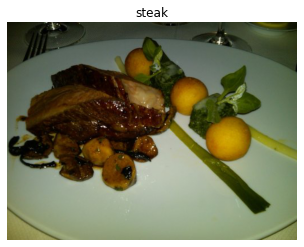

In [ ]:
# vizualizarea unei imagini aliatoare din setul de tarining
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# vizualizarea imagini de ami sus in format array
img

array([[[ 19,  17,   4],
        [ 17,  18,   4],
        [ 17,  18,   4],
        ...,
        [ 15,  22,   4],
        [ 15,  22,   4],
        [ 14,  21,   3]],

       [[ 18,  16,   3],
        [ 16,  17,   3],
        [ 16,  17,   3],
        ...,
        [ 14,  21,   3],
        [ 14,  21,   3],
        [ 14,  21,   3]],

       [[ 17,  15,   2],
        [ 16,  17,   3],
        [ 16,  17,   3],
        ...,
        [ 13,  20,   4],
        [ 13,  20,   2],
        [ 12,  19,   1]],

       ...,

       [[122, 118,  55],
        [120, 116,  53],
        [121, 117,  54],
        ...,
        [124, 130,  70],
        [123, 129,  67],
        [123, 129,  67]],

       [[121, 117,  54],
        [118, 114,  51],
        [117, 113,  50],
        ...,
        [121, 127,  67],
        [125, 131,  69],
        [128, 134,  72]],

       [[119, 115,  52],
        [115, 111,  48],
        [114, 110,  47],
        ...,
        [116, 122,  62],
        [122, 128,  66],
        [129, 135,  73]]

In [ ]:
# Vizualizarea formei imaginii
img.shape # reintorce (latimea, inaltimea, canalele culorilor)

(384, 512, 3)

In [ ]:
# Normara valorilor pixelor (intre 0 si 1) prin simpla divizarea acestora la valoarea maxima 255
img/255. 

array([[[0.0745098 , 0.06666667, 0.01568627],
        [0.06666667, 0.07058824, 0.01568627],
        [0.06666667, 0.07058824, 0.01568627],
        ...,
        [0.05882353, 0.08627451, 0.01568627],
        [0.05882353, 0.08627451, 0.01568627],
        [0.05490196, 0.08235294, 0.01176471]],

       [[0.07058824, 0.0627451 , 0.01176471],
        [0.0627451 , 0.06666667, 0.01176471],
        [0.0627451 , 0.06666667, 0.01176471],
        ...,
        [0.05490196, 0.08235294, 0.01176471],
        [0.05490196, 0.08235294, 0.01176471],
        [0.05490196, 0.08235294, 0.01176471]],

       [[0.06666667, 0.05882353, 0.00784314],
        [0.0627451 , 0.06666667, 0.01176471],
        [0.0627451 , 0.06666667, 0.01176471],
        ...,
        [0.05098039, 0.07843137, 0.01568627],
        [0.05098039, 0.07843137, 0.00784314],
        [0.04705882, 0.0745098 , 0.00392157]],

       ...,

       [[0.47843137, 0.4627451 , 0.21568627],
        [0.47058824, 0.45490196, 0.20784314],
        [0.4745098 , 0

Image shape: (512, 383, 3)
Image shape: (512, 512, 3)


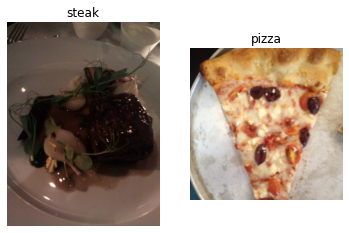

In [ ]:
# Vizualizarea mai multor date 
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Normarea si crearea bancurilor de date

Definirea cailor catre datele de training si datele de test.

In [ ]:
# Definirea cailor catre datele de training si datele de test.
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Urmatorul pas consta in conversia datelor in **bancuri** (**batches**).

Un **banc** este un mic subset al setului de date care este analizat de model pe durate procesului de training. Adica, decat sa analizeze 10000 de imagini concomitent in procesul de training pentru a determina legitatea, modelul poate analiza concomitent doar 32 de imagini. 

Aces lucru se realizeaza din cauza:
* 10,000 imagini (sau mai multe) pot sa nu incap[ in memoria procesorului (GPU).
* Incercarea de a gasi concomitent o legitatea in 10,000 imagini poate avea drept rezultat un model care va avea o precizie mai mica.

DImensiunile banc-ului pot fi diferite dar valoarea 32 sa demonstrat ca este mult mai efectiva decat alte valori si de obicei este luata drept valorea implicita in cadrul multor functii de preprocesare a datelor. 

Pentru formarea bancu-urilor initial se creaza o instanta a  [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) pentru fiecare set de date.

Parametrul `rescale` cu valoarea `1/255.`  asigura normarea datelor, adica valorile pixelor nu va fi in gama 0-255 si vor trece in gama 0-1 

In [ ]:
# Crearea generatoarelor de date training si test si normarea acestor date 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


Se creaza bancurile datelor incarcanduse imaginile de pe caile respective utilizand metoda [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)cu parametri:
* `directory` specifica calea catre folderul imaginilor de training `train_dir` si de test `test_dir`.
* `target_size` defineste formatul imaginilor `(inaltimea, latimea)`
* `class_mode` defineste tipul problemei de clasificare `'binary'` cand sunt doar 2 clase sau `'categorical'` cand sunt mai multe clase.
* `batch_size` defines;te lungimea bancului care implicit are valoarea 32. 

In interiorul bancurilor taote imaginile vor avea aceleasi dimensiuni conform setarilor parametrului `target_size`


In [ ]:
# Formarea bancurilor de date 
# Setarea seed
import tensorflow as tf
tf.random.set_seed(42)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Obtinearea unui banc din datele de training 
images, labels = train_data.next() # obtinerea unmatorului ('next') banc de images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Vizualizarea primelor 2 imagini din acest banc
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
# Vizualizarea valorilor labels a acestui banc
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

## Crearea modelului cu ajutorul ANN

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Creaarea unui model cu 2 nivele ascunse cu cate 4 neuroni fiecare
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # transforma date in 1-D, format acceptat de nivelele dense la intrare
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilarea modelului
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Implementarea modelului
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 206ms/step - loss: 0.8961 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Modelul `model_1` asigura o precizie de 50 % adica echivalenta cu unui model de ghicire

Se vizualizeaza structura modelului `model_1`

In [ ]:
# Verificare structurii modelului
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 602116    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Un lucru notabil al aceste istructuri este numarul relativ mare de parametri trainable: 602,141

> 🔑 **Nota:** Prin parametrii trainable se poate intelege *legitatile pe care modelul lepoate invata din setul de date*. Intuitiv se poate spune ca cu cat numarul acetora este mai mare cu atat e mai bine. Dar in aces caz, diferenta consta in 2 stiluri de utilizare a modelului. In cazul nivelelor dense cu cat nuamrul parametrilor de training este mai marea cu atat mai mare este si numarul posibilelor legitati  ce pot di invatate. **In cazul nivelelor convolutionale, se cauta si se invata modelul pe cele ma importante caracteristici ale imaginilor**, deci numarul parametrilor trainable cu cat este mai mic cu atat este ami usor de descifrat diferenta dintre caracteristicile imaginilor.  

Se imbunatateste modelul prin adaugarea unui nivel ascuns suplimentare si cresterea numarului de neuroni in fiecare nivel ascuns

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea unui model similar cu model_1 dar se adauga un nivel ascuns suplimentar si se creste numarul de neuroni in nivelele ascunse
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(100, activation='relu'), # cresterea numarului de neuroni de la 4 a 100 (pentru fiecare nivel)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # adaugarea unui nivel scuns
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilarea modelului
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Implementarea modelului
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 2.5411 - accuracy: 0.6020 - val_loss: 1.0135 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6686 - accuracy: 0.7227 - val_loss: 0.4565 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5548 - accuracy: 0.7433 - val_loss: 0.4666 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6929 - accuracy: 0.7227 - val_loss: 0.4365 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4973 - accuracy: 0.7773 - val_loss: 0.5125 - val_accuracy: 0.7380


Modelul `model_2` asigura o acuratete pe setul de training de ~80%  si pe setul de test de 79%.

Se vizualizeaza arhitectura modelului `model_2`

In [ ]:
# Verificare structurii modelului
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In cazul modelului `model_2` acuratetea este mai marea dar a crescut considerabil numarul parametrilor trainable la 15,073,201

## Arhitectura tipica a retelelor neuronale convolutionale (CNN)

O retea convolutionala va contine urmatorele componente:

| **Tipul hiperparametrilor/nivelului** | **Ce face?** | **Valori tipice** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

Cum ar arata grafic?:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)

## Crearea modelului CNN baseline

Pentru a intelege retelele neuronale convolutionale (CNN) se va crea o retea neuronala simpla (baseline) care apoi va fi extinsa spre a creste performantele modelulii. Aceasta retea simpla va fi o versiune a modelului depe site-ul [CNN explainer](https://poloclub.github.io/cnn-explainer/) si va consta din 3 nivele convolutionale.

In [ ]:
# Importul tutror claselor pentru a crea mai usor modelul
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Crearea modelului (modelul baseline ce contine 3 nivele convolutionale)
model_3 = Sequential([
  Conv2D(filters=10, # setarea numarului de filtre
         kernel_size=3, # setarea dimensiunilor kernel-ului 
         strides=1, # setarea pasului de deplasere a kernel-ui
         padding='valid', # setarea marginii pentru apastra dimensiunea
         activation='relu', 
         input_shape=(224, 224, 3)), # setarea formei datelor de intrare (pentru nivelul de intrarea)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # setarea nivelului de iesire
])

O CNN de obice are structura:

```
Intrarea -> Nivele Conv + activare ReLU (pentru ne-liniaritate) -> Nivele Pooling (de obicei MaxPool) -> Nivele dense in calitate de iesire
```

Componentele nivelului `Conv2D:

* "`2D`" specifica faptul ca intarile sunt bidomensionale (inaltime si latime), chiar daca ele au 3 canale a culorilor, convolutia se va executa pe fiecare canal separat.
* `filters` - numarul "extractorilor de caracteristici" care se vor aplica supra imaginii.
* `kernel_size` - dimensiunile filtrului, de exemplu pentru `kernel_size` egal cu `(3, 3)` (sau 3) filtru va avea dimeniunea 3x3, adica va acoperi un spatiu de 3x3 picseli la fiecare extragere de caracteristici. Cu cat filtrul este mai mic cu atat mai detaliate sunt caracteristicile extrase.
* `stride` - numarul de pixel peste care `filter`ii va pasi la fiecare extarege de c aracteristici. O `stride` egal cu 1 inseamna ca filtru se va deplasa cu un pixel de fiecare daca cind va extrage caracteristici.
* `padding` - poate fi `'same'` sau `'valid'`, `'same'` adauga zerouri pe la marginile imaginii deci iesirile nivelului convolutional vor avea aceleasi dimensiuni ca intrarile, in timp ce `'valid'` (valoare implicita) taie din pixelii de la marginea imaginii deci iesirile nivelului convolutional vor fi de dimensiuni mai mici decat intrarile.


O **caracteristica** poate fi considerata orice parte importanta a imaginii. De exemplu, in cazul nostru, o caracteristica poate fi forma circulara a unei pizza sau marginile pronuntate ale steak-ului. 

Aceste **caractersitici** nu sunt definite de catre programator, dar sunt invatate de catre model prin aplicarea diferitor filtre asupra imaginilor. a
> 📖 **Resources:** 
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/).
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) .
  * [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).


In continuare se va compila modelul `model_3`

In [ ]:
# Compilarea modelului
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Implementarea modelului

Parametrii noi utilizat:
* `steps_per_epoch` - numarul de bancuri ce vor fi analizate la fiecare epoch de catre model, in cazul nostru, vor modelul va invata din toate bancurile deci numarul acestora va fi lungime `train_data` (1500 imagini cate 32 in banc = 1500/32 = ~47 pasi)
* `validation_steps` - acelasi ca si mai sus doar ca se vor considera `test_data`(500 imagini de test cate 32 in banc 32 = 500/32 = ~16 pasi)

In [ ]:
# Implementarea modelului
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 41s 265ms/step - loss: 1.3440 - accuracy: 0.6380 - val_loss: 0.4669 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4507 - accuracy: 0.8000 - val_loss: 0.3945 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3274 - accuracy: 0.8667 - val_loss: 0.3734 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1830 - accuracy: 0.9360 - val_loss: 0.4931 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.0720 - accuracy: 0.9813 - val_loss: 0.4935 - val_accuracy: 0.8180


Modelul `model_3` asigura o acuratete pe setul de training de ~98%  si pe setul de test de 80%.

## Evaluarea modelului (CNN) baseline

Initial se construieste curba pierderilor pentru modelul baseline `model_3`

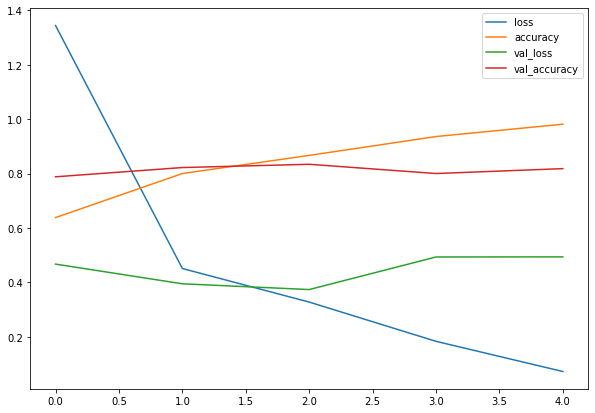

In [ ]:
# Vizualizarea curbei perderilor
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10, 7));

Se elaboreaza o functie ce va afisa separat functia piederilor si acuratetea

In [ ]:
# Afisarea separata a datelor
def plot_loss_curves(history):
  """
  Returneaza curba pierderilor si acuraterea in grafice diferite.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Afisarea pierderilor
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Afisare acuratetei
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

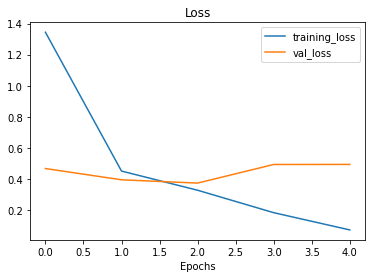

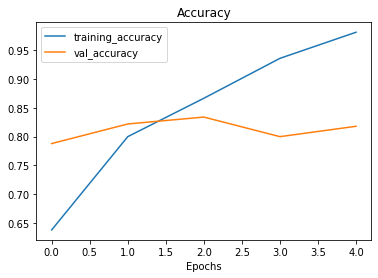

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_3`
plot_loss_curves(history_3)

Analiz\ndcurba pierderilor se observa ca modelul `model-3` este **overfitting** pe datele de training.

> 🔑 **Nota:** Cand **pierderile pe datele de validare (validation loss) incep a creste**, atunci modelul este **overfitting** pe datele de training. Acest lucru se poate explica prin faptul ca modelul a descoperit *foarte bine* legitatile pe datele de training dar capacitatea de a implementa aceste legitati pe date noi se diminueaza.

Ideal ar fi ca atat curba pierderilor pe datele de training cat si ce de pe datele de test sa scada

Se vizualizeaza arhitectura modelului `model_3`

In [ ]:
# Verificare structurii modelului
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Reducerea **overfitting**

Pentru a creste fenomenul overfitting pe datele de test se va:
* creste numarul nivelelor conv
* creste nuamrul filtrelor conv
* adauga nivele dense suplimentare dupa nivelul flattened

Pentru reducere fenomenului overfitting pe datele de test se va
* adauga nivele de regularizare de exemplu [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* realiza data augmentation
* adauga mai multe date...

Se elaboreaza un nou model `model_4` cu aceeasi structura ca `model_3` doar  ca se adauga nivele [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) dupa fiecarea nivel conv.

In [ ]:
# Crearea modelului `model_4`
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce numarul de caracteristici
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

Daca nivelele convolutionale detemina caracteristicile imaginilor, nivelele maxpool selecteaza cele mai importante caracteristici gasite.

Parametrul `pool_size` determina dimensiunile celulei din care se va alege valoarea maxima. In cazul dat celula va avea dimensiunile 2x2 pixeli. La iesire nivelului maxpool cei 4 pixeli vor fi substituiti cu un singur pixel de valoare egala cu valorea maxima a acestora.


In [ ]:
# Compilarea modelului `model_4`
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Implementarea modelului `model_4`
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.6065 - accuracy: 0.6560 - val_loss: 0.4603 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4676 - accuracy: 0.7920 - val_loss: 0.4257 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4315 - accuracy: 0.8193 - val_loss: 0.3538 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3891 - accuracy: 0.8420 - val_loss: 0.3401 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3805 - accuracy: 0.8293 - val_loss: 0.3278 - val_accuracy: 0.8660


Modelul `model_4` asigura o acuratete mai mica pe datele de training (83%) dar o acuratete mai mare pe datele de test (83%) comparativ cu modelul `model_3`.

Se vizualizeaza arhitectura modelului `model_4`

In [ ]:
# Verificare structurii modelului
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

In rezultatul utilizarii nivelelor max_pooling se reduce forma datelor de intrare in urmatorul nivel si respectiv se reduce numarul parametrilor trainable

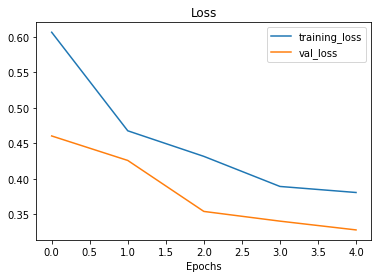

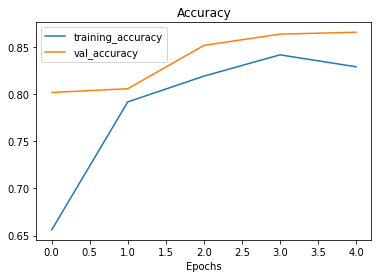

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_4`
plot_loss_curves(history_4)

Se observa ca curbele pierderilor pe datele de training si datele de test sum acum mai apropiate dar oricum curba de pierderi pe datele de test indica prezenta overfitting

In continuare se va incerca reducerea overfitting prin utilizarea data augmentation

**Data augmentation** este procesul de modificare a datelor de training pentru a o difersitate mai marea si a permite modelului sa invete legitati mai generale. Modificarea datelor presupune, ajustarea rotatiei imaginii rasturnand-o, decuplarea ei, deplasarea si altele. 

Acest lucru permite simularea tipurilor de date care pot fi aplicate modelului in lumea reala.

Pentru a implementa data augmentation este necesara reinstantirea  [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).


> 🔑 **Nota:** Data augmentation este aplicata doar asupra datelor de training. Utilizand parametrii de augmentation ai `ImageDataGenerator` imaginea ramane neschimbata in directoriul dar este modificata aliator atunci cand este incarcate in model in procvesul de implementare a acestuia.



In [ ]:
 # Crearea instantei ImageDataGenerator pentru datele de training cu data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotirea lina a imaginii intre 0 si 20 grade (nota: nu este un int sau un float)
                                             shear_range=0.2, # taiera imaginii
                                             zoom_range=0.2, # zoom-area imaginii
                                             width_shift_range=0.2, # deplasarea imaginii pe latime
                                             height_shift_range=0.2, # deplasarea imaginii pe inaltime
                                             horizontal_flip=True) # intoarecera imaginii pe orizontala

# Crearea instantei ImageDataGenerator pentru datele de training fara data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Crearea instantei ImageDataGenerator pentru datele de test fara data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Aplicarea generatorul de modificarea a datelor `ImageDataGenerator` pe imagini cu createa bancurilor

In [ ]:
# Importul datelor de training din directoriu si modificarea lor prin data augmentation si crearea bancurilor
print("Imagini de training modificate:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) #  Oprirea amestecarii datelor (nerecomandat, se realizeaza doar pentru vizualizare)

# Importul datelor de training din directoriu si crearea bancurilor fara modificarea lor
print("Imagini de training nemodificate:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Oprirea amestecarii datelor (nerecomandat, se realizeaza doar pentru vizualizare)

# Importul datelor de test din directoriu si crearea bancurilor fara modificarea lor
print("Imagini de test nemodificate:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Imagini de training modificate:
Found 1500 images belonging to 2 classes.
Imagini de training nemodificate:
Found 1500 images belonging to 2 classes.
Imagini de test nemodificate:
Found 500 images belonging to 2 classes.


In [ ]:
# Obtinearea unui banc din datele de training modificate si nemodificate
images, labels = train_data.next() # obtinerea urmatorului ('next') banc de images/labels ne modificate
augmented_images, augmented_labels = train_data_augmented.next() # obtinerea urmatorului ('next') banc de images/labels modificate

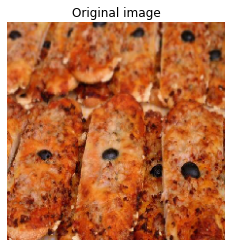

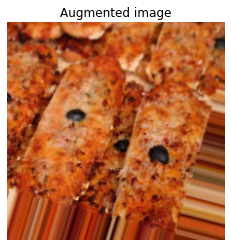

In [ ]:
# Afisarea aliataore a imaginii originale si a imagini modificarea
random_number = random.randint(0, 32) # selectarea aliatoare a imaginii din bancul de 32 imaginin
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Crearea modelului `model_5` identic cu `model_4` doar ca se va implementa pe datele modificate

In [ ]:
# Crearea modelului
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compilarea modelului
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Implementarea modelului
history_5 = model_5.fit(train_data_augmented, # datele de training sunt modificate prin data augmentation
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 547ms/step - loss: 0.8416 - accuracy: 0.4987 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6920 - accuracy: 0.5313 - val_loss: 0.6809 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6940 - accuracy: 0.5040 - val_loss: 0.6698 - val_accuracy: 0.7040
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6707 - accuracy: 0.6213 - val_loss: 0.7121 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6588 - accuracy: 0.6053 - val_loss: 0.5462 - val_accuracy: 0.7900


Deaorece a fost setat `shuffle=False` cu scopuri demonstrative (ca sa se poata vedea una si aceai imagine in versiunea origina si versiunea modificata), modelul `model_5` asigura o acuratete mai mica pe datele de training (62%) si pe datele de test (78%) comparativ cu modelul `model_4_` 
Pentru creste acuratetea este necesara setarea `shuffle=True`.

Totodata se observa ca timpul fiecarea epoch de taining este maim area pentru datele de trainig modificate decat pentru cele nemodificate (~26s per epoch vs. ~10s per epoch). Acet lucru este cauzat de faptul ca `ImageDataGenerator` asigura modficarea datelor atunci cand ele sunt incarcate in model. Partea buna e ca datele initiale rman nemodificate.

> 🔑 **Nota:** O posibila metoda de cresterea a vitezei de manipularea a setului de date este [TensorFlow's parrallel reads and buffered prefecting options](https://www.tensorflow.org/tutorials/images/data_augmentation).

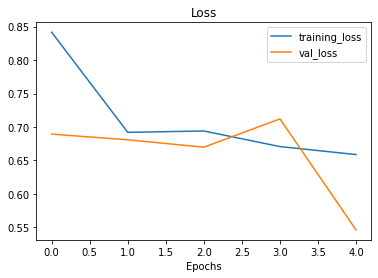

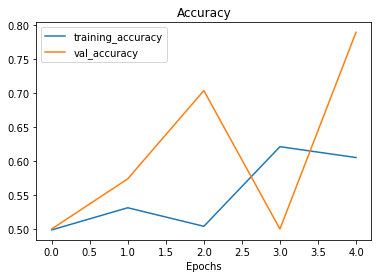

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_5`
plot_loss_curves(history_5)

In continuarea se va amesteca datele modificate `shuffle=True` pentru cresterea acuratetei

In [ ]:
# Importul datelor de training din directoriu si modificarea lor prin data augmentation si crearea bancurilor
print("Imagini de training modificate:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Amestecarea datelor (optiune implicita)


Imagini de training modificate:
Found 1500 images belonging to 2 classes.


Crearea modelului `model_6` identic cu `model_5` doar ca se va implementa pe datele modificate amestecate

In [ ]:
# Crearea modelului
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compilarea modelului
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Implementarea modelului
history_6 = model_6.fit(train_data_augmented_shuffled, # datele sunt modificate si amestecate
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6610 - accuracy: 0.5913 - val_loss: 0.5968 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5935 - accuracy: 0.6940 - val_loss: 0.5006 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5029 - accuracy: 0.7593 - val_loss: 0.4417 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.4863 - accuracy: 0.7727 - val_loss: 0.3776 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4691 - accuracy: 0.7767 - val_loss: 0.3773 - val_accuracy: 0.8240


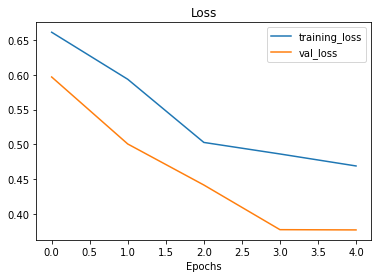

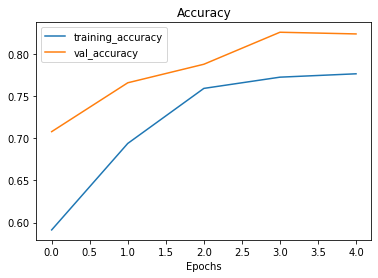

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_6`
plot_loss_curves(history_6)

## Repetarea experimentelor pina la satisfacerea cerintelor

Pentru a continua cu imbunatatirea modelului se pot realiza urmatoarele:
* Cresterea numarului nivelelor (de exemplu crestera numarului de nivele convolutionale).
* Cresterea numurului filtrelor in fiecare nivel convolutional (de exemplu de la 10 la 32, 64, sau 128).
* Cresterea numarului de incercari de training (mai multe epochs).
* determinarea valori ideale a learning rate.
* Obtinerea mai multor date.
* Utilizarea **transfer learning** pentru a valorifica ceea ce a invatat alt model si a ajusta cest model pentru cazul tau.

Aplicarea acestor setari (exceptandu-le pe ultime doua) asupra modelului se refera de obicei la asa numita **hyperparameter tuning**.


## Realizarea predictiei pe propriile date

In [ ]:
# Vizualizarea numelor claselor
class_names

array(['pizza', 'steak'], dtype='<U9')

Prima imagine de realizarea a prodictie este [un steak delicios](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg).

--2021-10-30 10:52:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-10-30 10:52:26 (32.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



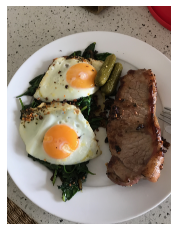

In [ ]:
# importul si afisarea imaginii
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Verificarea dimensiunilor imagini
steak.shape

(4032, 3024, 3)

In [ ]:
# Afisarea numerica a imaginii
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

Pentru a putea realiza predictia pe propriile date este necesar ca aceste date sa se supuna acelori operatiuni de preprocesare care au fost aplicate si datelor de training

Crearea unei puctii de preprocesare a datelor proprii

In [ ]:
# Crearea unei fuctii ce importa imaginea si o redimensioneaza pentru a putea fi aplicata modelului
def load_and_prep_image(filename, img_shape=224):
  """
  Ceteste imaginea din filename, o transforma intr-un tensor 
  si o redimensioneaza in(img_shape, img_shape, colour_channel).
  """
  # citirea imaginii din directoriu
  img = tf.io.read_file(filename)

  # Decodarea imagini citite si foramrea unui tensor asigurandu-se 3 canale a culorilor 
  img = tf.image.decode_image(img, channels=3)

  # Redimensionarea imaginii ( in aceleasi dimensiune ca imaginile de training a modelului)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Normarea valoriulor pixelor imaginii
  img = img/255.
  
  return img

In [ ]:
# Incarcarea si preprocesarea propriei imagini
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Vizualizarea dimensiunilor imaginii proprii sub forma de tensor
steak.shape

TensorShape([224, 224, 3])

In realitatea imaginile de training a modelului au dimensiunile `(batch_size, 224, 224, 3)` adica mai contin o dimensiune care reprezinta numarul de imagini in banc.

Pentru a putea realiza predictia este necesar de a adauga acesta dimensiune utilizand [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
# adaugarea unei noi dimensiuni (axe)
print(f"Forma inainte de adaugare unei noi dimensiuni: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # adaugarea unei noi dimensiuni pe axa 0
print(f"Forma dupa adaugarea unei noi dimensiuni: {steak.shape}")
steak

Forma inainte de adaugare unei noi dimensiuni: (224, 224, 3)
Forma dupa adaugarea unei noi dimensiuni: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

Acum se poate realiza predictia

In [ ]:
# Realizarea predictie pe tronsor-ul propriei imagini utilizand modelul `model_6`
pred = model_6.predict(steak)
pred

array([[0.6978703]], dtype=float32)

Metoda `predict()` returneaza probabilitatea ca imagninea face parte din clasa 1 sau 0. Daca probabilitatea e mai marea de 0,5 atunci se va considera clasa 1 iar daca mai mica de 0,5 atunci clasa 0

In [ ]:
# Rotungirea probabilitatii pentru a determina clasa
pred_class = int(tf.round(pred))
pred_class

1

In [ ]:
#Determinarea numelui clasei conform indexului acesteai in lista class_names
pred_class = class_names[pred_class]
pred_class

'steak'

Pentru a simplifica realizarea operatiilor de mai sus se elaboreaza o metoda 

In [ ]:
# Crearea metodei de incarcare a imaginii si realizarea predictiei si afisarea rezultatelor
def pred_and_plot(model, filename, class_names):
  """
  Importul imaginii localizate in filename, realizarea predictie cu model si
  afisarea imginii cu titlul drep rezultat al predictiei.
  """
  # Importul imaginii si procesare ei
  img = load_and_prep_image(filename)

  # adaugarea unei dimendiuni suplimentarea
  img_dim=tf.expand_dims(img, axis=0)

  # Realizarea predictie
  pred = model.predict(img_dim)
  print(pred)

  # adaugarea unei logici ce va permite utilizarea functie petru calsificare binara si clasificare categorica
  #verificarea daca predictia area mai mult de o valoarea (clasificare categorica)
  if len(pred[0])>1:
    # se alege denumirea clasei predictia cu indexul maxim
    pred_class = class_names[tf.argmax(pred[0])]
  # caca predictia are doar o valoarea (clasificare binara)
  else: 
    # Obtinerea denumirii clasei
    pred_class = class_names[int(tf.round(pred))]

  # Afisarea imaginii si a clasei prezise
  plt.imshow(img)
  plt.title(f"Predictie: {pred_class}")
  plt.axis(False);

SyntaxError: ignored

[[0.6978703]]


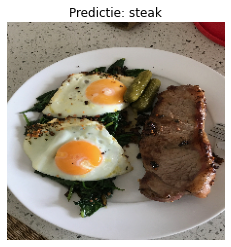

In [ ]:
 # realizarea predictie pe imaginea proprie
pred_and_plot(model_6, "03-steak.jpeg", class_names)

--2021-10-30 10:52:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-10-30 10:52:29 (42.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

[[0.16236185]]


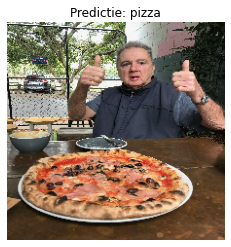

In [ ]:
# realizarea unei alte predictii
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_6, "03-pizza-dad.jpeg", class_names)

#Problema de clasificare categorica (multiclase)

Pentru problema de clasificare categorica se va elabora un model ce va permite pe baza imaginii sa detecteze tipul mancarii conform unei liste de 10 tipuri de mancare.

Pentru realizarea acestui model se vor urma aceeasi pasi ca si in cazul problemei binare de clasificare si anume:

1. Importul si vizualizarea datelor
2. Preprocesarea datelor (pregatirea acestora pentru a fi aplicate modelului)
3. Crearea modelului si implementarea lui
4. Evaluarea modelului
5. Ajustara diferitor parametri pentru imbunatatirea modelului
6. Repetarea procedurii de imbunatatire pana la satisfacerea cerintelor
7. Realizarea predictie pe propriile date
8. Salvarea si incarcarea modelului

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)

## Importul si vizualizarea datelor

In [ ]:
import zipfile

# descaracarea fisierului zip ce contine imagini a 10 clase de mancaruri
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Dezarhivarea fisierului descarcat
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-30 10:52:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   168MB/s    in 2.9s    

2021-10-30 10:52:32 (168 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Inspectarea tuturor folderelor si subfolderelor directoriului  `10_food_classes`.

In [ ]:
import os

# Trecera prin directoriul 10_food_classes si afisarea listei fisierlor ce le contine
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [ ]:
# fixara cailor catre datele de training si datele de test
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Obtinerea denumirilor claselor in conformitate cu denumirea folderului
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


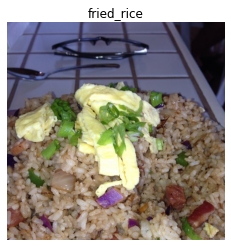

In [ ]:
 # Vizualizarea unei imagini aliataore din setul de training
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # obtinera unei clase aliatoare

## Preprocesarea datelor

Normarea, redimensionarea si formarea bancurilor imaginilor

In [ ]:
# Normarea valorilor pixelor si crearea genratorului de date
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Incarcarea imaginilor, redimensionarea lor si formarea bancurilor
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # se modifica in categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Crearea modelului si implementarea lui

Spre deosebire de modelele pentru probleme de clasificare binara, in cadrul modelelor de clasificare categorica se vor realiza urmatoarele modificari:

* Se modifica numarul neuronilor in nivelul de iesire la 10 (cate un neuron pentru fiecare clasa).
* In nivelul de iesire se modifica tipul activarii in `'softmax'` in locul activarii `'sigmoid'`.
* Se modifica functia perderilor (loss function) in  `'categorical_crossentropy'` in locul `'binary_crossentropy'`.

In continuare se va crea un model care se va considera model baseline

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Crearea modelului
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # se modifica numarul de neuroni la 10 si functia de activarea 'softmax'
])

# Compilarea modelului
model_7.compile(loss="categorical_crossentropy", # se modifica in categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Implementarea modelului
history_7 = model_7.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 234ms/step - loss: 2.2041 - accuracy: 0.1800 - val_loss: 2.0786 - val_accuracy: 0.2548
Epoch 2/5
235/235 [==============================] - 55s 234ms/step - loss: 1.9574 - accuracy: 0.3251 - val_loss: 2.0078 - val_accuracy: 0.3112
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.5895 - accuracy: 0.4652 - val_loss: 2.0230 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 54s 230ms/step - loss: 1.0025 - accuracy: 0.6660 - val_loss: 2.3922 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 54s 230ms/step - loss: 0.4314 - accuracy: 0.8661 - val_loss: 3.3331 - val_accuracy: 0.2844


## Evaluarea modelului

In [ ]:
# Evaluarea modelului pe datele de test
model_7.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 3.3331 - accuracy: 0.2844


[3.3331241607666016, 0.28439998626708984]

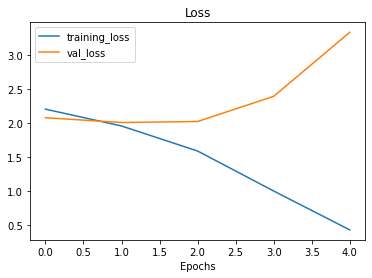

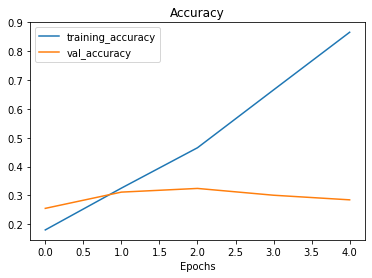

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_7`
plot_loss_curves(history_7)

Intrucat exista o diferenta considerabila intre tendintel;e curbelor pierderilor pe datele de training si datele de test se poate spune  ca modelul este overfitting, adica invata foarte bine legitatile pe setul de training dar nu poate generaliza aceste legitati pe setul de test 

## Ajustarea parametrilor pentru imbunatatirea modelului

Prevenirea efectului **overfitting** numita si procedura de **regularizarea (regularization)** poate fi realizata prin urmatoarele cai: 

- **Acumularea mai multor date** 
- **Simplificarea modelului** 
- **Utilizarea data augmentation** 
- **Utilizarea transfer learning** 

Intrucat nu este posibila acumularea mai multor date se va incerca prevenirea efectului overfitting prin simplificarea modelului. Se vor indeparta 2 nivele convolutionale astfel ca numarul acestora se va modifica de la 4 la 2 


In [ ]:
# Elaborea modelului simplifica prin excludera a 2 nivele convolutionale din modelul `model_7`
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 216ms/step - loss: 2.2635 - accuracy: 0.2291 - val_loss: 1.9701 - val_accuracy: 0.2976
Epoch 2/5
235/235 [==============================] - 50s 214ms/step - loss: 1.7588 - accuracy: 0.4076 - val_loss: 1.9173 - val_accuracy: 0.3348
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4334 - accuracy: 0.5296 - val_loss: 1.9591 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 1.0388 - accuracy: 0.6713 - val_loss: 2.2641 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.6263 - accuracy: 0.8149 - val_loss: 2.6391 - val_accuracy: 0.3152


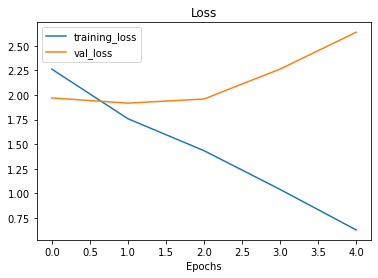

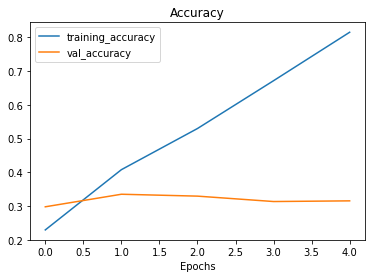

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_8`
plot_loss_curves(history_8)

Analizandu-se curbele pierderilor se observa ca rezultatel obtinute prin simplificarea modelului sunt Chiar mai proaste decat cele initiale de acea se va abondona idea simplificarii modelului si se va incerca reducerea overfitting prin introducerea data augmentation

In [ ]:
# Crearea instantei generatorului de date modificate
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

# Aplicarea generatorului asupra datelor de training
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Datele modificate se vor aplica unui model identic modelului inital `model_7`.

Pentru a nu scri modelul de la zero se va realiza [`clonarea modelului`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) existent adica clonarea structurii modelului `model_7`.

In [ ]:
# Clonarea modelului (utilizara arhitecturii unui model existent)
model_9 = tf.keras.models.clone_model(model_7)

# Compilarea modelului clonat
model_9.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Implementarea modelului cu datele modificate
history_9 = model_9.fit(train_data_augmented, # datele sunt modeificate
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 129s 548ms/step - loss: 2.2558 - accuracy: 0.1591 - val_loss: 2.1755 - val_accuracy: 0.2112
Epoch 2/5
235/235 [==============================] - 130s 551ms/step - loss: 2.1179 - accuracy: 0.2383 - val_loss: 2.0279 - val_accuracy: 0.2768
Epoch 3/5
235/235 [==============================] - 131s 556ms/step - loss: 2.0845 - accuracy: 0.2544 - val_loss: 2.0867 - val_accuracy: 0.2388
Epoch 4/5
235/235 [==============================] - 130s 551ms/step - loss: 2.0439 - accuracy: 0.2776 - val_loss: 1.8842 - val_accuracy: 0.3476
Epoch 5/5
235/235 [==============================] - 130s 553ms/step - loss: 2.0142 - accuracy: 0.2939 - val_loss: 1.8581 - val_accuracy: 0.3512


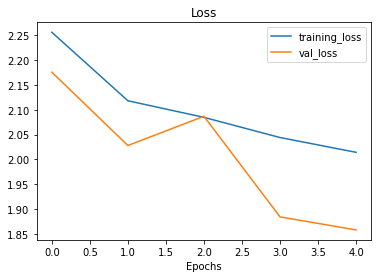

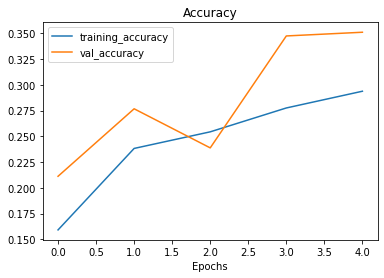

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_9`
plot_loss_curves(history_9)

Analizandu-se curba pierderilor se observa ca aceasta are o tendinta buna si respectiv efectul overfitting este prevenit insa se obbserva ca acuratetia predictie pe datele de test este de 39% adica destul de mica.

Pentru a creste aceasta acurratete se pot modifica diferit parametri pina se va ajunge la imbunatatirea dorita.

In continuarea se va crea un model `model_10` care va fi clona a modelului `model_9` si se va mari numarul de incercari de invatare (epochs=10)

In [ ]:
# Clonarea modelului (utilizara arhitecturii unui model existent)
model_10 = tf.keras.models.clone_model(model_9)

# Compilarea modelului clonat
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Implementarea modelului cu datele modificate si numar crescut epochs=10
history_10 = model_10.fit(train_data_augmented, # datele sunt modificate
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 133s 561ms/step - loss: 2.2001 - accuracy: 0.1961 - val_loss: 2.0349 - val_accuracy: 0.2640
Epoch 2/10
235/235 [==============================] - 131s 556ms/step - loss: 2.0702 - accuracy: 0.2587 - val_loss: 2.0065 - val_accuracy: 0.2692
Epoch 3/10
235/235 [==============================] - 130s 552ms/step - loss: 2.0195 - accuracy: 0.2811 - val_loss: 1.9104 - val_accuracy: 0.3288
Epoch 4/10
235/235 [==============================] - 131s 557ms/step - loss: 1.9709 - accuracy: 0.3108 - val_loss: 1.8105 - val_accuracy: 0.3848
Epoch 5/10
235/235 [==============================] - 131s 559ms/step - loss: 1.9283 - accuracy: 0.3328 - val_loss: 1.7556 - val_accuracy: 0.3884
Epoch 6/10
235/235 [==============================] - 132s 560ms/step - loss: 1.9016 - accuracy: 0.3403 - val_loss: 1.7629 - val_accuracy: 0.3956
Epoch 7/10
235/235 [==============================] - 130s 555ms/step - loss: 1.8782 - accuracy: 0.3505 - val_loss: 1.7657 -

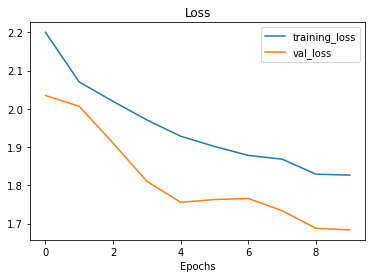

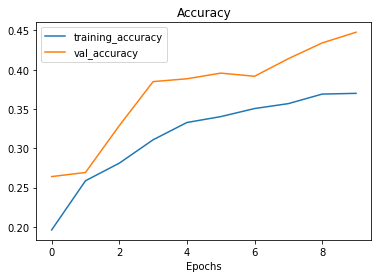

In [ ]:
# Afisarea pierderilor si a accuratetei pentru modelul `model_10` implementat pe 10 epochs
plot_loss_curves(history_10)

Odata cu cresterea numarului incercarilor de training a crescut un pic acuratetea dar daca se va creste si mai mult numarul de incercari poate aparea efectul overfitting.

Se poate incerca cresterea performantelor modelului prin modeificarea si a altor hyperparametri insa cel mai recomandat este utilizarea **tranfer learning**

## Realizarea predictie pe propriile date

In [ ]:
# Afisarea listei claselor din care fac parte imaginile de training
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Acum se va incarca propriile imagini

In [ ]:
# -q pentru  "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Realizarea predictiei pe propriile date utilizand modelul `model_10`

[[0.07984915 0.06455466 0.02953694 0.1656867  0.09521222 0.12540683
  0.01348497 0.04982131 0.25996703 0.11648023]]


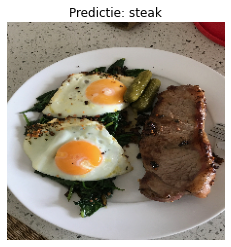

In [ ]:
# Realiazrea predictiei cu model_10
pred_and_plot(model=model_10, 
              filename="03-steak.jpeg", 
              class_names=class_names)

[[0.29674482 0.18121488 0.01301723 0.08889223 0.09322722 0.00979365
  0.17253724 0.03794772 0.03622663 0.07039829]]


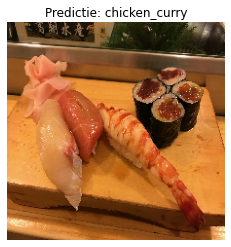

In [ ]:
# realizarea unei alte predictii
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

[[0.08473866 0.06176884 0.02284023 0.06068737 0.265552   0.12635812
  0.07177493 0.03590092 0.16992559 0.10045327]]


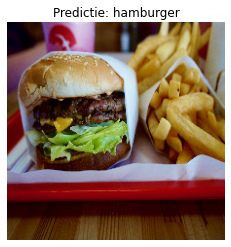

In [ ]:
# realizarea unei alte predictii
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

[[0.0509438  0.02648166 0.05560206 0.03225385 0.14889519 0.15202652
  0.1510059  0.04247722 0.04828891 0.29202497]]


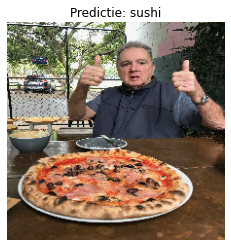

In [ ]:
# realizarea unei alte predictii
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

Modelul `model_10` nu realizaeaza o predictie tocmai reusita deoarece acuratetea acestuia pe datele de test este de ~45% 

## Savarea si incarcarea modelului

Pentru salvarea modelului se utilizeaza functia [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) iar pentru incarcarea acestuia functia [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load).

In [ ]:
# Salvarea modelului model_10
model_10.save("model_10_salvat")

INFO:tensorflow:Assets written to: model_10_salvat/assets


In [ ]:
# Incarcarea modelului salvat si evaluarea lui
model_10_salvat = tf.keras.models.load_model("model_10_salvat")
model_10_salvat.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.6835 - accuracy: 0.4476


[1.6834511756896973, 0.44760000705718994]

In [ ]:
# Evaluarea modelului pina la salvare
model_10.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 1.6835 - accuracy: 0.4476


[1.6834514141082764, 0.44760000705718994]

# 🛠 Computer vision & convolutional neural networks in TensorFlow Exercises

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/). 
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words
2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  * What is the kernel size?
  * What is the stride? 
  * How could you adjust each of these in TensorFlow code?
3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.


# 📖 Computer vision & convolutional neural networks in TensorFlow Extra-curriculum

* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.
* **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.
* **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing. 
* **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.
* **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.